# Insertion professionnelle des docteurs en France

## 0. Préalable

Importation des modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Chargement du jeu de données

In [ ]:
doctorat_0 = pd.read_csv('fr-esr-insertion-professionnelle-des-diplomes-doctorat-par-etablissement.csv', delimiter=';')

In [36]:
# on réalise une copie de notre dataset pour ne pas l'altérer durant notre étude
doctorat = doctorat_0.copy()

Bref aperçu du contenu du dataset

In [ ]:
doctorat.sample(3) # visualisons un échantillon de 3 enregistrements aléatoires de notre dataset

## 1. Exploratory Data Analysis (EDA)

### 1.1. Analyse de forme

Dimension du dataset

In [37]:
doctorat.shape # dimension du dataset (nombre de lignes, nombre de colonnes)

(450, 29)

Analyse du type de chaque variable

In [ ]:
doctorat.dtypes # retourne le type de chaque variable

**Remarque** : Certaines variables quantitatives sont de type object car elles contiennent des valeurs 'ns'(non significatif) et 'nd'(non disponible). Transformons ces valeurs en NaN.

In [38]:
for colonne in doctorat.columns:
	doctorat[colonne].replace(['nd', 'ns'], [np.nan, np.nan], inplace=True)

Puis nous pouvons caster ces variables en type float.

In [39]:
for index, colonne in enumerate(doctorat.columns):
	try:
		doctorat[colonne] = doctorat[colonne].astype(float)
	except ValueError:
		index += 1
doctorat.dtypes

annee                                                                 float64
diplome                                                                object
situation                                                              object
remarque                                                               object
disca                                                                  object
part_femmes                                                           float64
age_moyen_a_la_soutenance                                             float64
part_docteurs_etrangers                                               float64
eff_rep                                                               float64
taux_rep                                                              float64
part_docteurs_declarant_avoir_ete_finances_pour_realiser_la_these     float64
taux_insertion                                                        float64
part_stable                                                     

In [40]:
doctorat.dtypes.value_counts()

float64    21
object      8
dtype: int64

Analyse des valeurs manquantes

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(doctorat.isna(), cbar=False)

In [41]:
# doctorat.isna().sum()
(doctorat.isna().sum() * 100 / doctorat.shape[0]).sort_values()

annee                                                                  0.000000
numero_uai_ori                                                         0.000000
lib_etablissement_2014                                                 0.000000
lib_etablissement_2020                                                 0.000000
taux_rep                                                               0.000000
eff_rep                                                                0.000000
numero_uai_2020                                                        0.000000
disca                                                                  0.000000
diplome                                                                0.000000
situation                                                              0.000000
remarque                                                               7.555556
part_femmes                                                           14.222222
part_docteurs_etrangers                 

> Résumé de l'analyse de forme

1. **Variable target :** taux_insertion
2. **Dimension du dataset :** (450, 29)
3. **Types des variables :** 8 qualitatives et 21 quantitatives
4. **Identification des valeurs manquantes :** 
- assez de Nan
- Les variables quantitatives contiennent généralement 44% de valeurs manquantes
- Les variables qualitatives sont quasiment toutes complètes
- Seule la variable 'part_docteurs_en_emploi_dans_la_meme_region_que_leur_etablissement' contient plus de 70% de valeurs manquantes

- Les variables 'annee' et 'diplome' ne varient pas. On a respectivement annee = 2014 et diplome = DOCTORAT. Ces variables vont donc être supprimées plus tard.
- Les variables 'numero_uai_ori' et 'numero_uai_2020' contiennent des valeurs uniques. A enlever aussi

### 1.2. Analyse de fond

Elimination des colonnes inutiles

In [42]:
doctorat.drop(['annee', 'diplome', 'numero_uai_ori', 'numero_uai_2020'], axis=1, inplace=True) # suppression des variables contantes et à valeurs uniques

Elimination des lignes inutiles

Certains enregistrements ne contiennent pas le taux d'insertion. Or il s'agit là de la variable principale à analyser (la target). Nous allons donc les supprimer.

In [108]:
doctorat.dropna(subset=['taux_insertion'], inplace=True) # suppression des lignes ne contenant pas le taux d'insertion professionnelle

In [109]:
doctorat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 446
Data columns (total 25 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   situation                                                           250 non-null    object 
 1   remarque                                                            216 non-null    object 
 2   disca                                                               250 non-null    object 
 3   part_femmes                                                         250 non-null    float64
 4   age_moyen_a_la_soutenance                                           248 non-null    float64
 5   part_docteurs_etrangers                                             248 non-null    float64
 6   eff_rep                                                             250 non-null    float64
 7   taux_rep         

Visualisation de la target

In [110]:
# doctorat['taux_insertion'].value_counts()
doctorat['taux_insertion'].value_counts().sort_values()

60.0      1
73.0      1
69.0      1
64.0      1
67.0      1
61.0      1
66.0      1
72.0      2
75.0      2
98.0      2
76.0      3
79.0      3
96.0      6
86.0      6
74.0      7
77.0      7
81.0      7
82.0      8
78.0      8
80.0      9
89.0     10
92.0     10
97.0     10
94.0     11
83.0     11
90.0     11
95.0     11
84.0     12
87.0     12
85.0     13
93.0     14
91.0     14
88.0     15
100.0    19
Name: taux_insertion, dtype: int64

Analyse des variables quantitatives 

In [111]:
doctorat.select_dtypes(include='number').describe()

,part_femmes,age_moyen_a_la_soutenance,part_docteurs_etrangers,eff_rep,taux_rep,part_docteurs_declarant_avoir_ete_finances_pour_realiser_la_these,taux_insertion,part_stable,part_cadre,part_temps_plein,part_secteur_academique,part_public_hors_secteur_academique,part_r_d_privee,part_privee_hors_secteur_academique_et_r_d,part_docteurs_en_emploi_a_l_etranger,part_docteurs_en_emploi_dans_la_meme_region_que_leur_etablissement,sal_net_q1_mensuel,sal_net_med_mensuel,sal_net_q3_mensuel,sal_brut_med_annuel
count,250.000000,248.000000,248.000000,250.000000,250.00000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,125.000000,250.00000,250.000000,250.000000,250.000000
mean,43.272000,31.596774,40.104839,49.440000,63.68800,74.696000,87.384000,58.764000,91.780000,92.820000,50.004000,20.448000,13.440000,16.116000,32.532000,30.648000,1900.11200,2201.932000,2657.696000,32394.448000
std,14.425756,2.973348,12.647074,51.079967,10.76318,19.450369,7.923108,14.703096,7.542889,7.329015,13.118398,14.688168,12.210602,8.188942,12.134826,17.106995,247.10207,280.949236,526.688354,4743.088629
min,11.000000,28.000000,9.000000,11.000000,32.00000,22.000000,60.000000,17.000000,64.000000,66.000000,7.000000,0.000000,0.000000,0.000000,6.000000,0.000000,1244.00000,1488.000000,1659.000000,21000.000000
25%,31.000000,29.000000,32.750000,21.000000,57.00000,60.000000,82.250000,48.250000,88.000000,89.000000,41.000000,10.000000,3.000000,11.000000,25.000000,20.000000,1722.50000,2049.750000,2330.750000,29280.000000
50%,45.000000,30.000000,40.000000,33.000000,62.00000,82.000000,88.000000,59.000000,93.500000,95.000000,50.000000,16.000000,11.000000,16.000000,32.000000,32.000000,1920.50000,2195.000000,2550.000000,32000.000000
75%,55.000000,34.000000,49.000000,52.000000,70.00000,90.000000,93.000000,69.000000,97.000000,100.000000,59.000000,29.000000,21.000000,21.000000,41.000000,42.000000,2074.00000,2373.000000,2833.000000,35267.750000
max,72.000000,39.000000,68.000000,320.000000,100.00000,100.000000,100.000000,91.000000,100.000000,100.000000,83.000000,83.000000,62.000000,46.000000,75.000000,77.000000,2625.00000,3125.000000,4958.000000,50000.000000


Histogramme des variables quantitatives

In [ ]:
# visualisation des variables flottantes
for colonne in doctorat.select_dtypes('float'):
	plt.figure()
	sns.distplot(doctorat[colonne])

Analyse des variables qualitatives

In [ ]:
doctorat.select_dtypes(include='object').describe()

,situation,remarque,disca,lib_etablissement_2014,lib_etablissement_2020
count,450,416,450,450,450
unique,2,2,4,103,99
top,36 mois après le diplôme,Etablissement ayant participé à l'enquéte mai...,Sciences et leurs interactions,NICE (fermé),UNIVERSITE DE LILLE
freq,225,216,162,8,16


Visualisation des variables qualitatives

In [ ]:
for colonne in doctorat.select_dtypes('object'):
	print(f'{colonne :-<50} {doctorat[colonne].unique()}')

In [ ]:
for colonne in doctorat.select_dtypes('object'):
	plt.figure()
	doctorat[colonne].value_counts().plot.pie()

Création de sous-ensembles

In [53]:
# ensemble des docteurs ayant choisi un métier dans le domaine des ...
sciences_interactions = doctorat[doctorat['disca'] == 'Sciences et leurs interactions']
sciences_vivant = doctorat[doctorat['disca'] == 'Sciences du vivant']
sciences_humanite = doctorat[doctorat['disca'] == 'Sciences humaines et humanités']
sciences_societe = doctorat[doctorat['disca'] == 'Sciences de la société']

# ensemble des résultats obtenus 1 ou 3 an(s) après obtention du doctorat
situation_1 = doctorat[doctorat['situation'] == '12 mois après le diplôme']
situation_3 = doctorat[doctorat['situation'] == '36 mois après le diplôme']

# ensemble de la nature des réponses ...
reponses_peu_fiables = doctorat[doctorat['situation'] == "Etablissement ayant participé à  l'enquéte mais dont l'effectif ou le taux de réponse est trop petit pour que les résultats soient jugés statistiquement fiables"]
reponses_peu_exploitables = doctorat[doctorat['situation'] == "Etablissement ayant participé à  l'enquéte mais dont l'effectif est trop petit pour que les résultats soient jugés exploitables ou respectant le secret statistique"]

Matrice de corrélation entre les variables quantitatives

In [ ]:
sns.heatmap(doctorat[doctorat.select_dtypes('number').columns].corr())

Le taux d'insertion professionnelle après 1 an

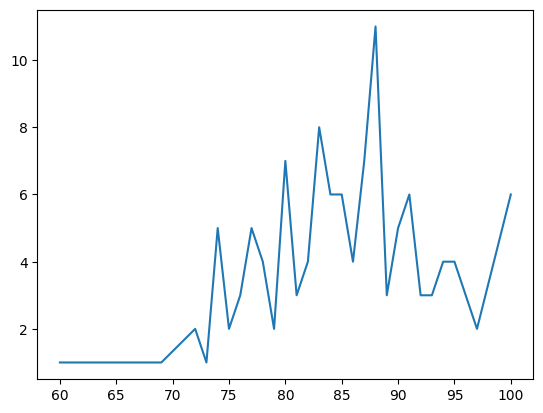

In [119]:
situation_1['taux_insertion'].value_counts().sort_index()

Le taux d'insertion professionnelle après 3 ans

In [118]:
situation_3['taux_insertion'].value_counts().sort_index()

74.0      2
77.0      2
78.0      4
79.0      1
80.0      2
81.0      4
82.0      4
83.0      3
84.0      6
85.0      7
86.0      2
87.0      5
88.0      4
89.0      7
90.0      6
91.0      8
92.0      7
93.0     11
94.0      7
95.0      7
96.0      3
97.0      8
98.0      2
100.0    13
Name: taux_insertion, dtype: int64

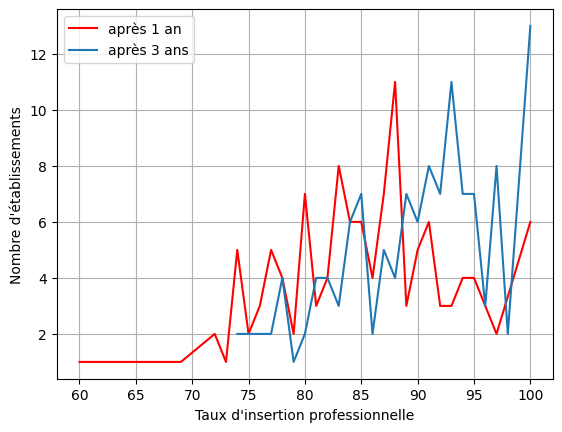

In [127]:
plt.figure()
plt.grid()
plt.plot(situation_1['taux_insertion'].value_counts().sort_index(), c='r', label='après 1 an')
plt.plot(situation_3['taux_insertion'].value_counts().sort_index(), label='après 3 ans')
plt.xlabel("Taux d'insertion professionnelle")
plt.ylabel("Nombre d'établissements")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(data=doctorat, x='disca', hue='remarque')

Les établissements avec les meilleurs taux d'insertion professionnelle de docteurs après 1 an

In [ ]:
plt.figure(figsize=(20,20))
plt.barh(situation_1['lib_etablissement_2014'], situation_1['taux_insertion'].sort_values())

Les établissements avec les meilleurs taux d'insertion professionnelle de docteurs après 3 ans

In [ ]:
plt.figure(figsize=(20,20))
plt.barh(situation_3['lib_etablissement_2014'], situation_3['taux_insertion'].sort_values())